In [1]:
import numpy as np
import pandas as pd

In [2]:
sales_data = pd.read_csv('/content/sales_data_with_discounts.csv')
sales_data

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [3]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [4]:
df_sales_data = pd.DataFrame(sales_data)

**Descriptive Analytics for Numerical Columns**

In [5]:
# Identifing numerical columns, as per their data types like integer and float
numeric_columns = df_sales_data.select_dtypes(include=['int', 'float']).columns
print(numeric_columns)

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [6]:
print('Mean for numerical columns:\n',df_sales_data.mean(numeric_only = True))

Mean for numerical columns:
 Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64


In [7]:
print('Median for numerical columns:\n',df_sales_data.median(numeric_only = True))

Median for numerical columns:
 Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64


In [8]:
print('Mode for numerical columns:\n',df_sales_data.mode(numeric_only = True, dropna = True))

Mode for numerical columns:
      Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0       3.0      400.0            24300.0           5.007822        69.177942   
1       NaN      450.0                NaN           5.055218        73.025199   
2       NaN      500.0                NaN           5.059801        93.649161   
3       NaN     1300.0                NaN           5.072124        94.682735   
4       NaN     8100.0                NaN           5.084108       102.705757   
..      ...        ...                ...                ...              ...   
445     NaN        NaN                NaN          19.940610     17900.983733   
446     NaN        NaN                NaN          19.965340     21153.498820   
447     NaN        NaN                NaN          19.976879     21496.675367   
448     NaN        NaN                NaN          19.982257     25328.224204   
449     NaN        NaN                NaN          19.992407     25738.022194   

Note: Different columns have differnt mode values


*   In columns Volume and Total Sales Value: only one value repeats the most. In these columns NaN means, no other values repeat frequently.
*   In other columns the many values repeat with same frequency and hence we have multiple values  



In [9]:
print('Standard Deviation for numerical columns:\n',df_sales_data.std(numeric_only = True))

Standard Deviation for numerical columns:
 Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64


In [10]:
df_sales_data.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


**Data Visualization**

**Histograms**

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

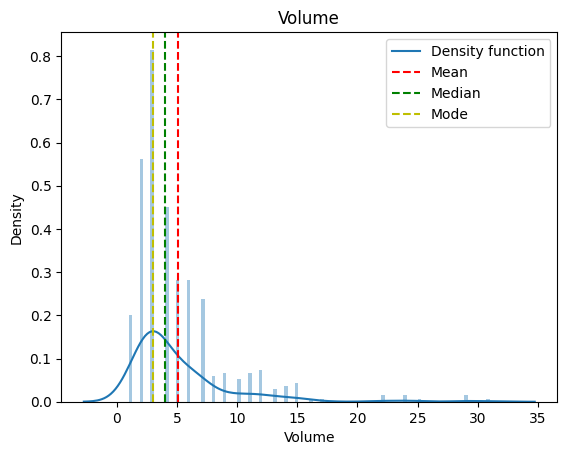

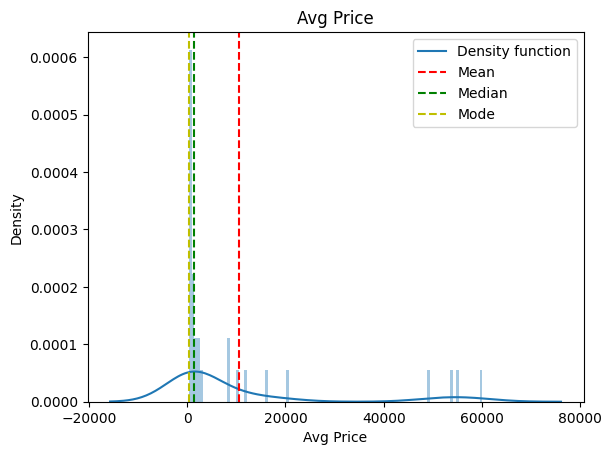

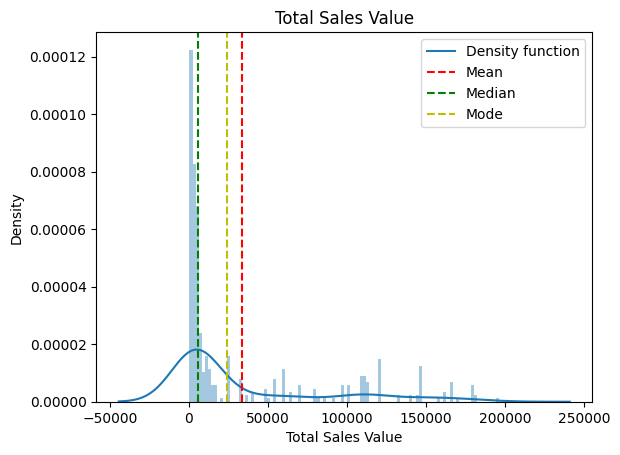

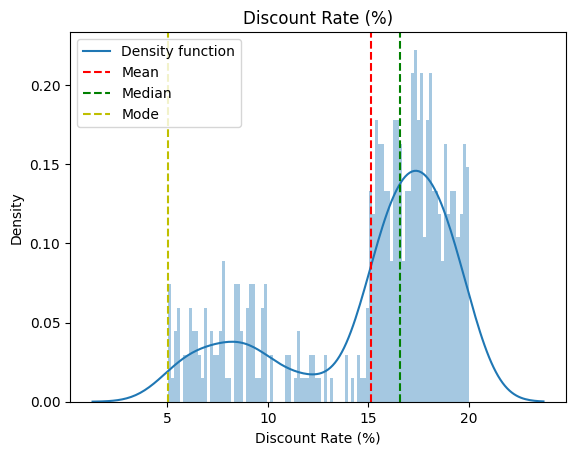

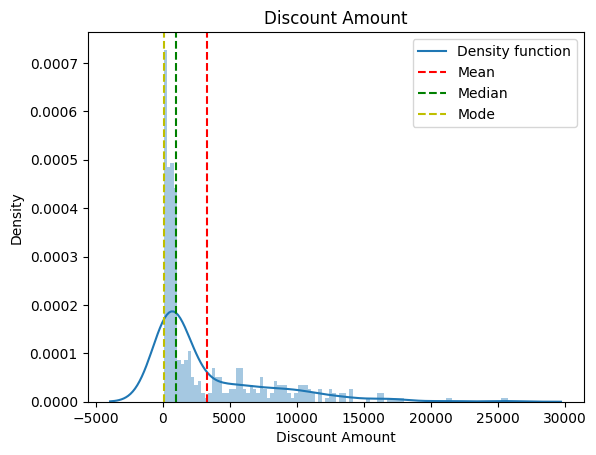

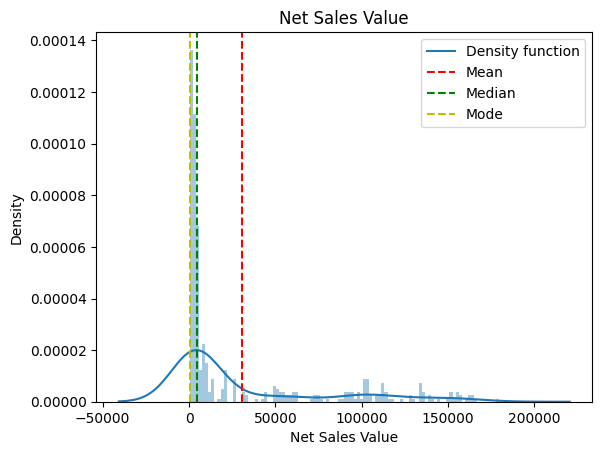

In [12]:
for nc in numeric_columns:
  mean = df_sales_data[nc].mean()
  median = df_sales_data[nc].median()
  mode = df_sales_data[nc].mode()[0]
  sns.distplot(df_sales_data[nc], bins = 100)
  plt.axvline(mean, ls = '--', c = 'r')
  plt.axvline(median, ls = '--', c = 'g')
  plt.axvline(mode, ls = '--', c = 'y')
  plt.legend(['Density function','Mean', 'Median', 'Mode'])
  plt.title(nc)
  plt.show()

Above are the histograms of numerical columns along with density function, mean, median and mode.


*   The columns 'Volume', 'Total Sales Value', 'Discount Amount', 'Net Sales Value', are right skewed distributions. These are predominantly uni-modal in nature with outliers at the large x values and they also have a long tail, meaning the values are spread across a wide range of values.
*   The column 'Avg Price' is a classic case where few outliers at large x-values appears to show a 2nd peak but in actuality it must be treated as a right skewed distribution with a few outliers.
*   In the distributions 'Avg Price', 'Total Sales Value', 'Discount Amount', 'Net Sales Value', the outliers have affected the mean value to shift to a larger value.
*   The column 'Discount Rate (%)' is left skewed bimodal distribution. Due to the wide spread x-values, the mean is not located at the large peak but at a smaller x-value. Also, the mode is located at a small value and this also is reflected on the mean.




**Boxplots**

In [13]:
def Boxplot_Values(i):
  i = list(i)
  i.sort()
  Q1 = i[int((len(sorted(i))/4)*1)]
  #print('Quartile 1 for the given data is',Q1)
  Q3 = i[int((len(sorted(i))/4)*3)]
  #print('Quartile 3 for the given data is',Q3)
  IQR = Q3 - Q1
  #print('InterQuartile range for the given data is',IQR)
  LL = Q1 - 1.5*(Q3 - Q1)
  #print('Lower Limit of the given data is',LL)
  UL = Q3 + 1.5*(Q3 - Q1)
  #print('Upper Limit of the given data is',UL)
  #print('Outliers in the given data are', [a for a in i if (a<=LL) | (a>=UL)])

  return Q1, Q3, IQR, LL, UL

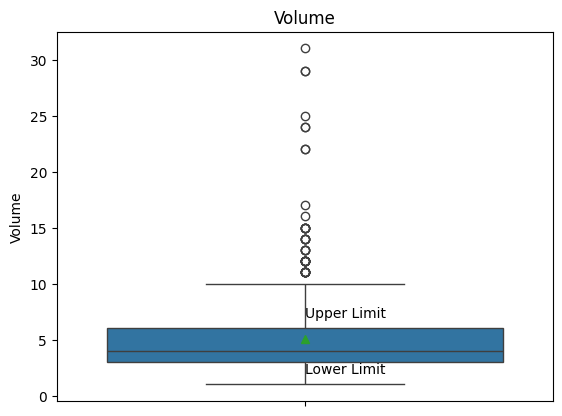

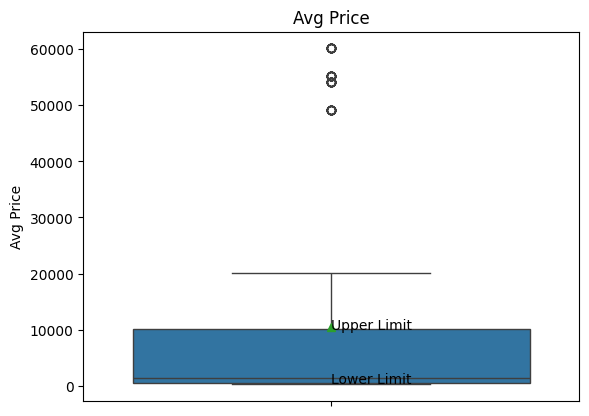

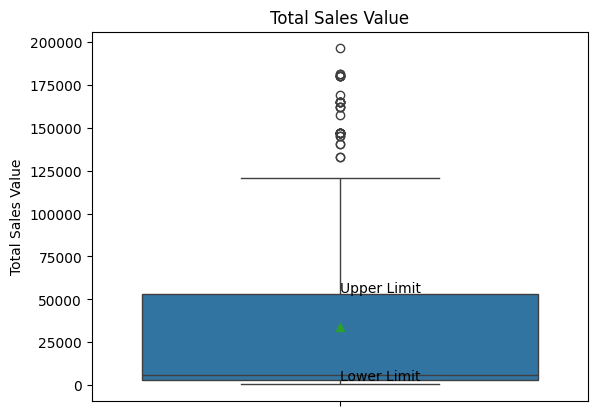

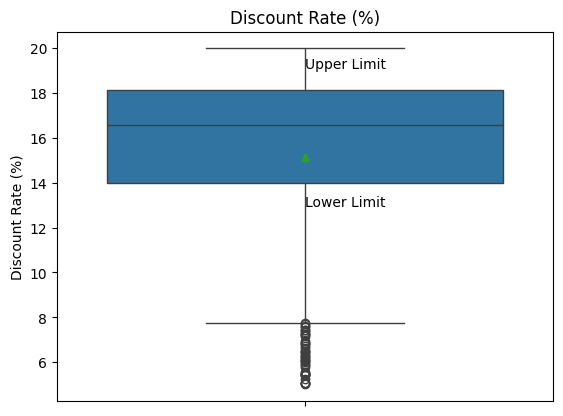

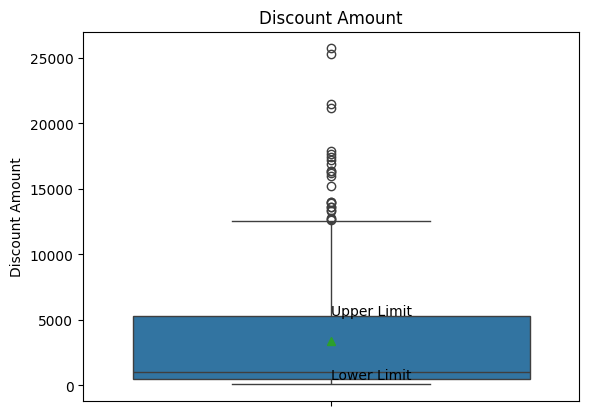

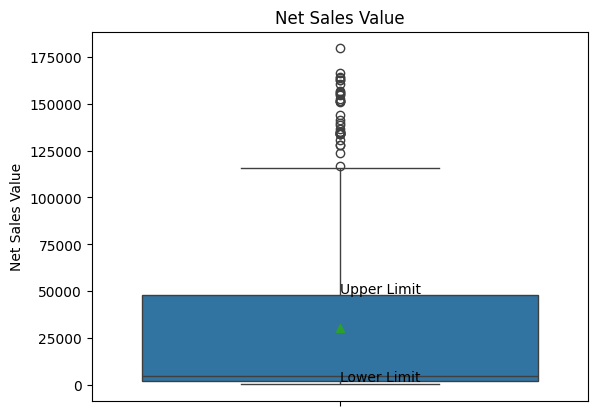

In [14]:
for np in numeric_columns:
  data = df_sales_data[np]
  Q1, Q3, IQR, LL, UL = Boxplot_Values(data)
  sns.boxplot(data, showmeans = True)
  plt.text(0, Q1-1, 'Lower Limit', fontsize = 10)
  plt.text(0, Q3+1, 'Upper Limit', fontsize = 10)
  plt.title(np)
  plt.show()

Above are boxplots for all numerical columns. We can see the upper and lower limits, inter quartile region represented by a rectangular box and the mean as a triangle.

The effects of outliers can be seen on the upper and lower limits and mean, where they have been shited along as per the outliers location.

**Bar Chart Analysis for Categorical Columns**

In [15]:
# Identifying categorical columns
object_columns = df_sales_data.select_dtypes(include=['object']).columns
print(object_columns)

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


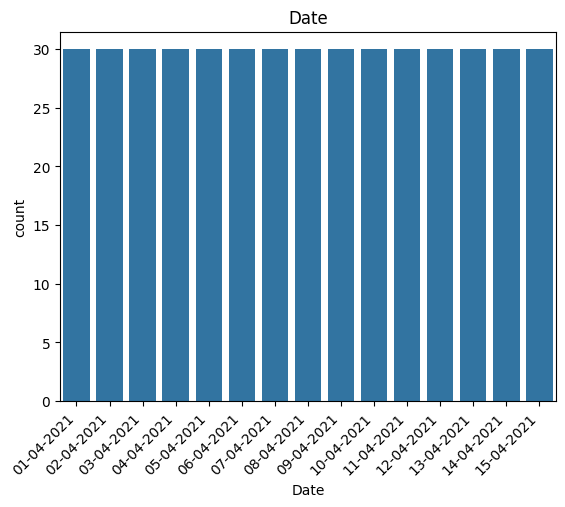

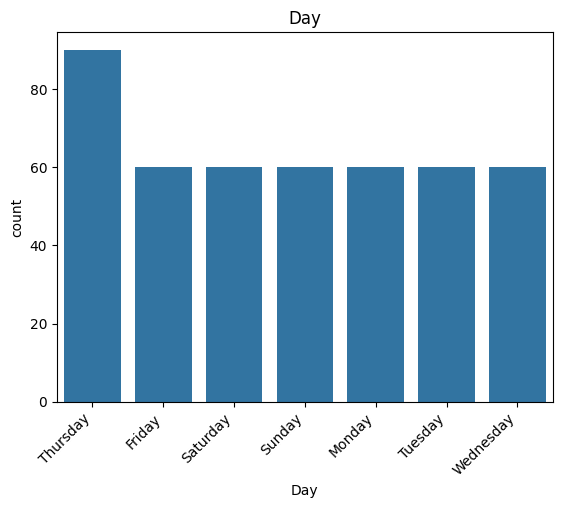

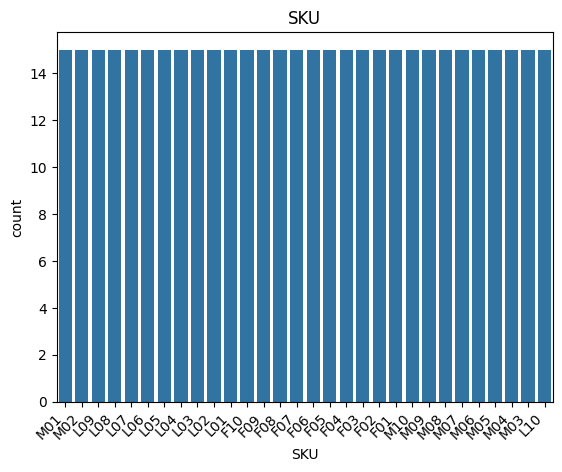

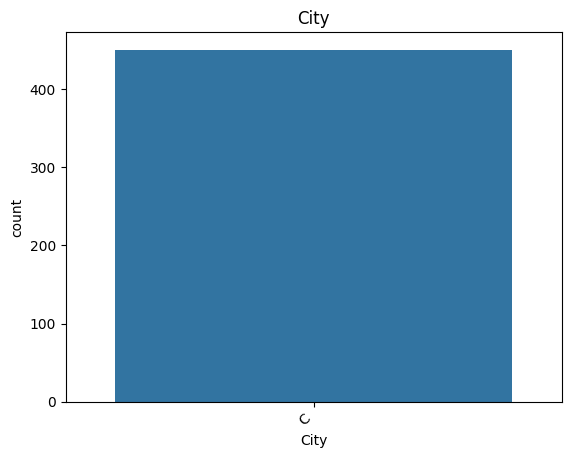

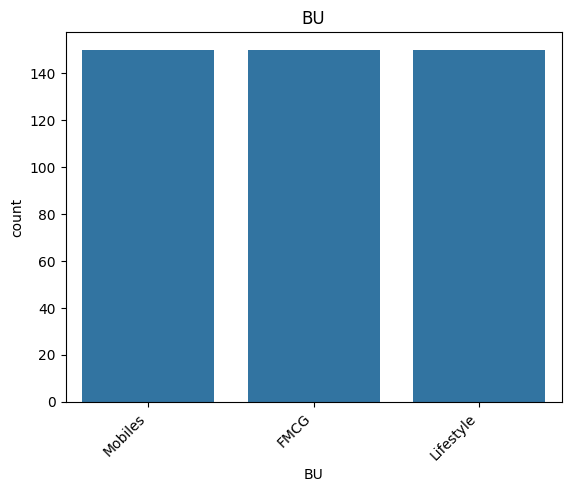

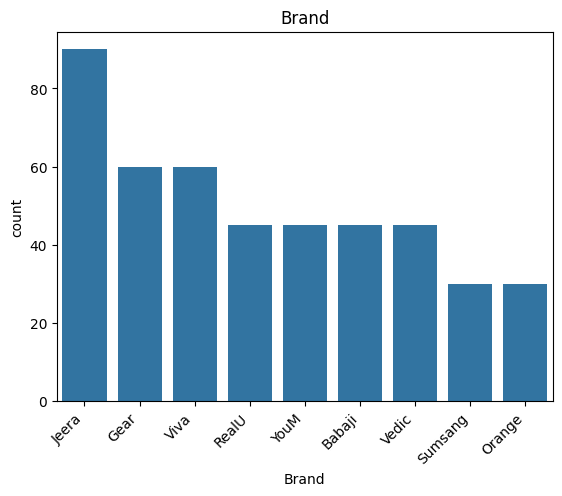

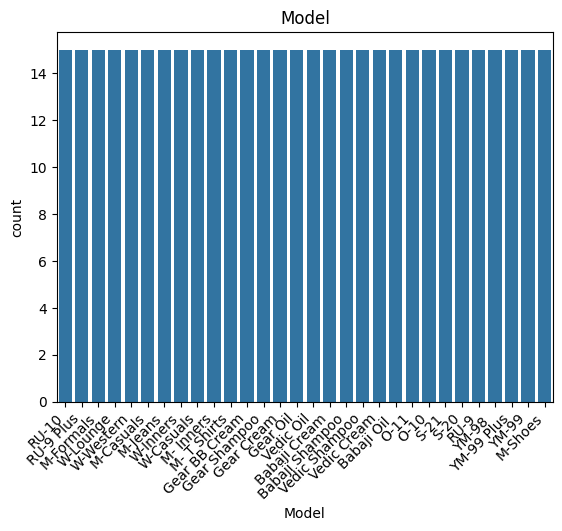

In [16]:
for oc in object_columns:
  ax = sns.barplot(x = df_sales_data[oc].value_counts().index, y = df_sales_data[oc].value_counts())
  plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
  plt.title(oc)
  plt.show()

**Standardization of Numerical Variables**


*   z-score normalization: z = (x - mu) / sigma
where x = Original value, mu = Mean of the column and sigma = Standard deviation of the column




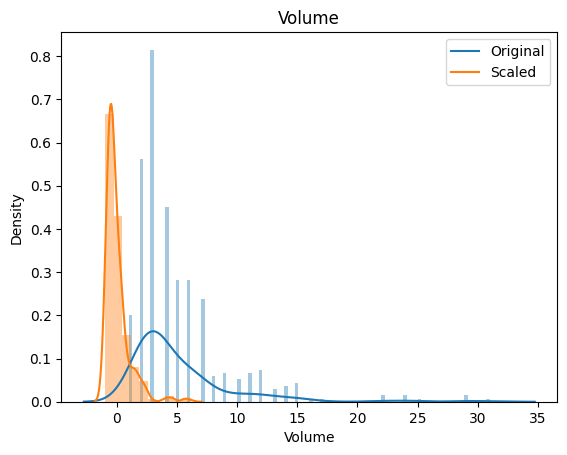

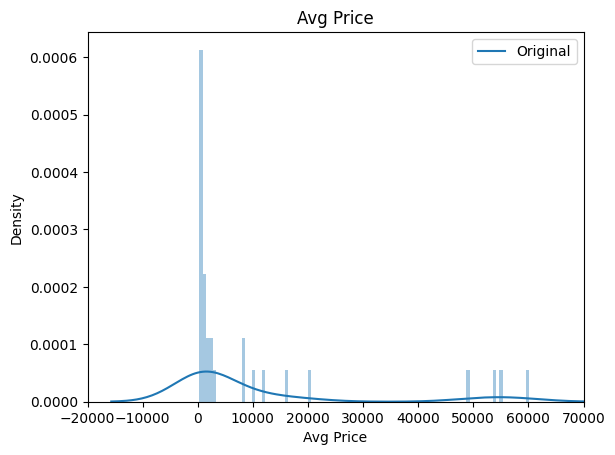

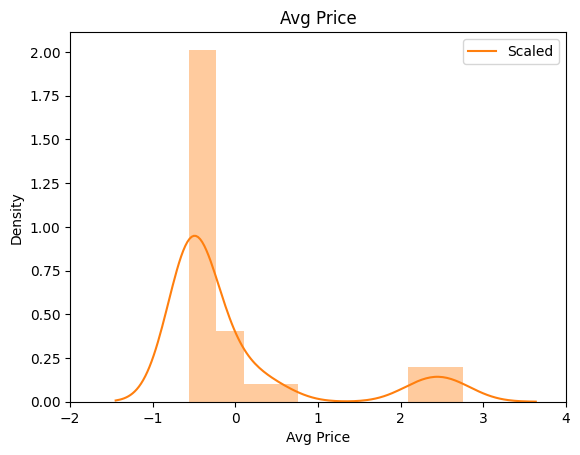

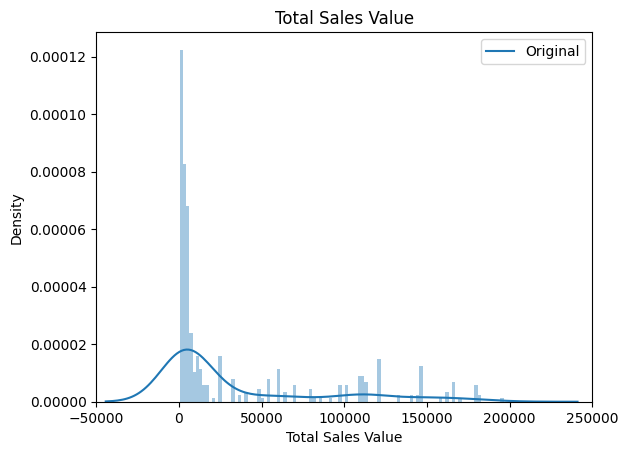

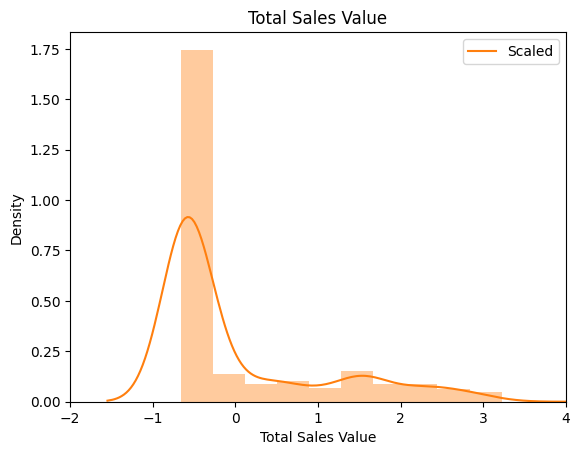

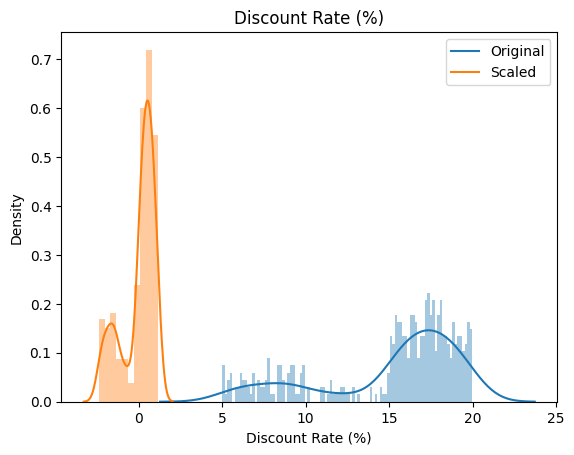

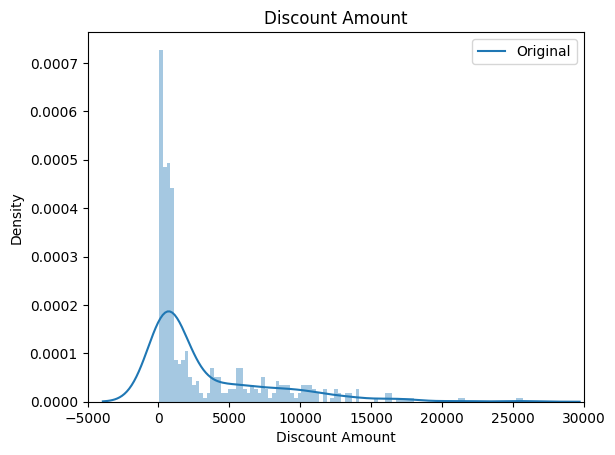

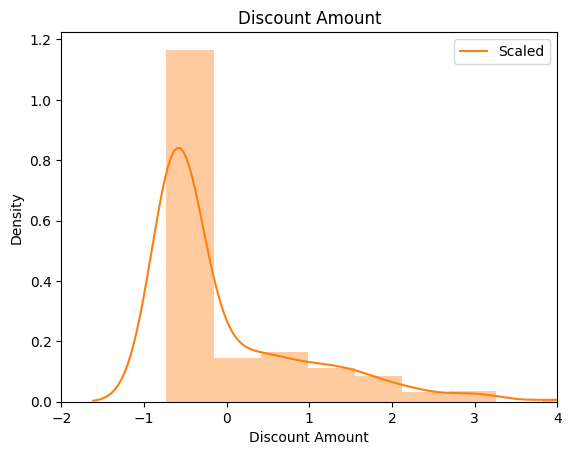

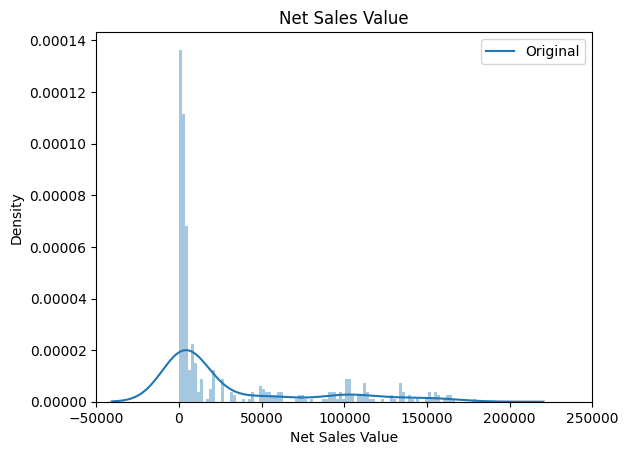

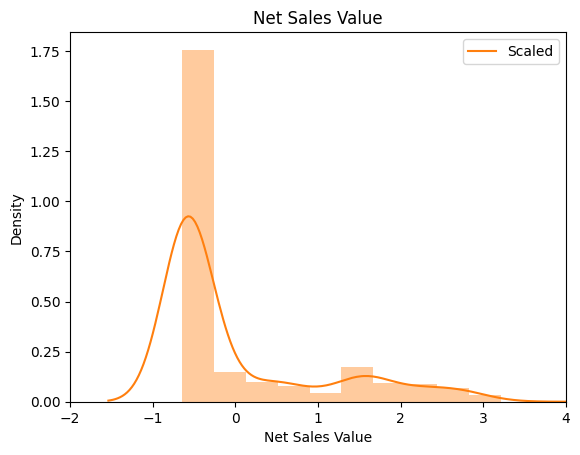

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_numeric_columns_scaled = pd.DataFrame(scaler.fit_transform(df_sales_data[numeric_columns]))
#print(df_numeric_columns_scaled, df_sales_data[numeric_columns])
df_numeric_columns_scaled.columns = numeric_columns
df_numeric_columns_scaled.head()
#print(df_numeric_columns_scaled, df_sales_data[numeric_columns])
#for nc in numeric_columns:
#  sns.distplot(df_sales_data[nc], bins = 100)
#  sns.distplot(df_numeric_columns_scaled[nc], bins = 10)
#  plt.legend(['Original','Scaled'])
#  plt.title(nc)
#  plt.show()

sns.distplot(df_sales_data[numeric_columns[0]], bins = 100)
sns.distplot(df_numeric_columns_scaled[numeric_columns[0]], bins = 10)
plt.legend(['Original','Scaled'])
plt.title(numeric_columns[0])
plt.show()

sns.distplot(df_sales_data[numeric_columns[1]], bins = 100, color = '#1f77b4')
plt.xlim(-20000, 70000)
plt.legend(['Original'])
plt.title(numeric_columns[1])
plt.show()
sns.distplot(df_numeric_columns_scaled[numeric_columns[1]], bins = 10, color = '#ff7f0e')
plt.xlim(-2, 4)
plt.legend(['Scaled'])
plt.title(numeric_columns[1])
plt.show()

sns.distplot(df_sales_data[numeric_columns[2]], bins = 100, color = '#1f77b4')
plt.xlim(-50000, 250000)
plt.legend(['Original'])
plt.title(numeric_columns[2])
plt.show()
sns.distplot(df_numeric_columns_scaled[numeric_columns[2]], bins = 10, color = '#ff7f0e')
plt.xlim(-2, 4)
plt.legend(['Scaled'])
plt.title(numeric_columns[2])
plt.show()

sns.distplot(df_sales_data[numeric_columns[3]], bins = 100)
sns.distplot(df_numeric_columns_scaled[numeric_columns[3]], bins = 10)
plt.legend(['Original','Scaled'])
plt.title(numeric_columns[3])
plt.show()

sns.distplot(df_sales_data[numeric_columns[4]], bins = 100, color = '#1f77b4')
plt.xlim(-5000, 30000)
plt.legend(['Original'])
plt.title(numeric_columns[4])
plt.show()
sns.distplot(df_numeric_columns_scaled[numeric_columns[4]], bins = 10, color = '#ff7f0e')
plt.xlim(-2, 4)
plt.legend(['Scaled'])
plt.title(numeric_columns[4])
plt.show()

sns.distplot(df_sales_data[numeric_columns[5]], bins = 100, color = '#1f77b4')
plt.xlim(-50000, 250000)
plt.legend(['Original'])
plt.title(numeric_columns[5])
plt.show()
sns.distplot(df_numeric_columns_scaled[numeric_columns[5]], bins = 10, color = '#ff7f0e')
plt.xlim(-2, 4)
plt.legend(['Scaled'])
plt.title(numeric_columns[5])
plt.show()

Above are the distributions before and after applying standardization (z-score). As can be seen the shape of the scaled data are similar to that of the original distributions, however it is interesting to note that scaled disrtibutions are less spread along the x-axis and hence easier to visualize while retaining most relevant features.

**Conversion of Categorical Data into Dummy Variables**

In [23]:
#object_columns
df_dummies = pd.get_dummies(df_sales_data[object_columns], drop_first = False)
df_dummies = df_dummies.astype(int)
df_dummies.tail(10)


,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,Date_06-04-2021,Date_07-04-2021,Date_08-04-2021,Date_09-04-2021,Date_10-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
440,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
442,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
